In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image

import matplotlib.pyplot as plt
import zipfile
from keras.utils import load_img

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d msambare/fer2013 

zip_ref = zipfile.ZipFile('fer2013.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/fer2013') # Extracts the files into the /fer2013 folder
zip_ref.close()

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 94% 57.0M/60.3M [00:01<00:00, 38.0MB/s]
100% 60.3M/60.3M [00:01<00:00, 33.4MB/s]


In [3]:
train_path = "/fer2013/train/"
test_path = "/fer2013/test/"

print(os.listdir(test_path))
print(os.listdir(train_path))

['sad', 'disgust', 'neutral', 'happy', 'surprise', 'angry', 'fear']
['sad', 'disgust', 'neutral', 'happy', 'surprise', 'angry', 'fear']


In [4]:
# Get Number of Images for each Emotion and Splitting

train_path = "/fer2013/train/"
test_path = "/fer2013/test/"
emotions = os.listdir(train_path)

len_train = {}
len_test = {}

X_train = []
y_train = []

X_test = []
y_test = []

for emotion in emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    for filename in file_train:
      img_path = os.path.join(train_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_train.append(img_array)
      y_train.append(emotion)

for emotion in emotions:
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test) 
    for filename in file_test:
      img_path = os.path.join(test_path, emotion) + '/' + filename
      img = Image.open(img_path)
      img = img.resize((48, 48))
      img_array = np.array(img)
      img_array = img_array.reshape(-1)
      X_test.append(img_array)
      y_test.append(emotion)
    
print("Train: ", len_train)
print("Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Test: ", total_test)

Train:  {'sad': 4830, 'disgust': 436, 'neutral': 4965, 'happy': 7215, 'surprise': 3171, 'angry': 3995, 'fear': 4097}
Test:  {'sad': 1247, 'disgust': 111, 'neutral': 1233, 'happy': 1774, 'surprise': 831, 'angry': 958, 'fear': 1024}
Total Train:  28709
Total Test:  7178


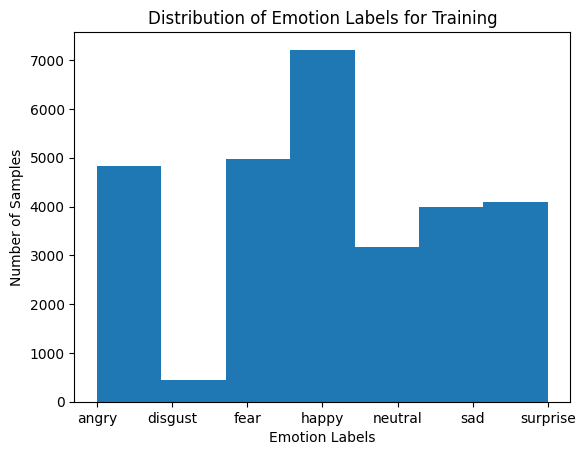

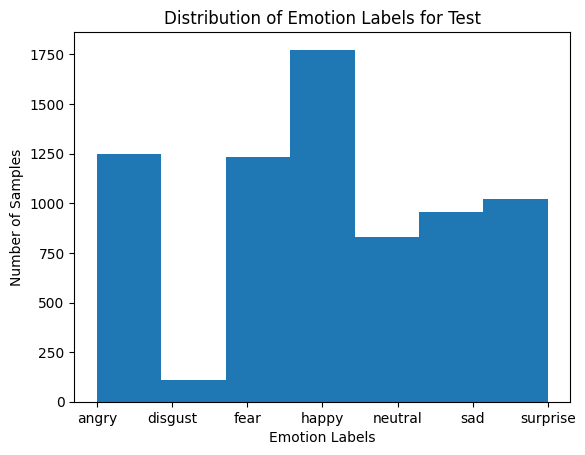

In [5]:
# Plot the distribution of the emotion labels in the dataset
plt.hist(y_train, bins=7)
plt.title('Distribution of Emotion Labels for Training')
plt.xticks(range(7), ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
plt.show()

# Plot the distribution of the emotion labels in the dataset
plt.hist(y_test, bins=7)
plt.title('Distribution of Emotion Labels for Test')
plt.xticks(range(7), ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
plt.show()

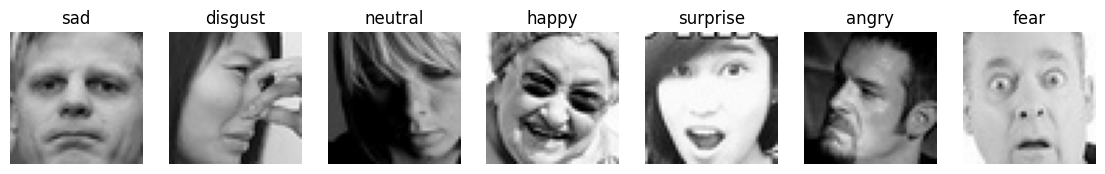

In [6]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_path):
    img = load_img((train_path + expression +'/'+ os.listdir(train_path + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [7]:
# convert the data to numpy arrays
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)

X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

# shuffling/randomizing training and testing data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
print(X_train)
print(y_train)

[[0.13333333 0.12156863 0.12941176 ... 0.00784314 0.03921569 0.02352941]
 [0.02745098 0.02745098 0.02352941 ... 0.03921569 0.00784314 0.        ]
 [0.01960784 0.03529412 0.16470588 ... 0.00784314 0.05490196 0.05490196]
 ...
 [0.15686275 0.15294118 0.16470588 ... 0.02745098 0.04313725 0.04313725]
 [0.63137255 0.42745098 0.25098039 ... 0.99215686 0.99607843 0.99607843]
 [0.30980392 0.38039216 0.43529412 ... 0.42745098 0.38823529 0.40784314]]
['happy' 'neutral' 'happy' ... 'surprise' 'sad' 'surprise']


In [8]:
# define the logistic regression model
model = LogisticRegression(multi_class='multinomial')

# train the model on the training data
model.fit(X_train, y_train)

# evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.37614934522151017
Precision: 0.3480831224238264
Recall: 0.37614934522151017
F1-score: 0.352739375170128


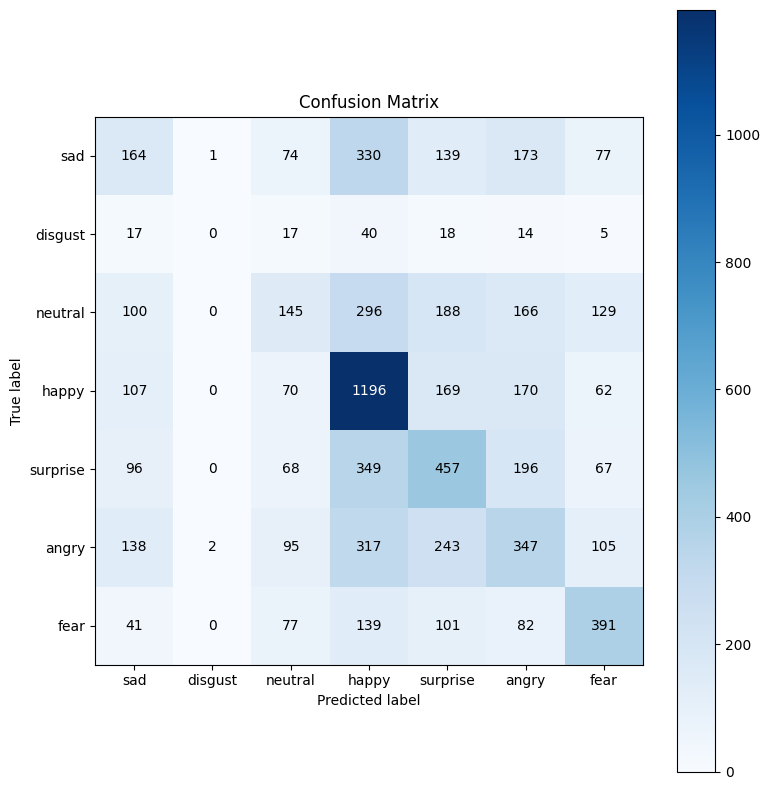

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=emotions,
       yticklabels=emotions,
       title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label')

# Add labels to the plot
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()